# Abalone Case Study

###### Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


##### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('abalone.csv')

In [61]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [62]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### About columns:

1.Sex

It represents the gender of Abalone

2.Length

In this column contain the Abalone body Length.

3.Diameter

In this column contain the Abalone body Diameter.

4.Height

In this column contain the Abalone Height.

5.whole weight

In this column contain the Weight of the Abalone. 

6.Shucked weight

In this column contain the Abalone Shucked weight. 

7.Viscera weight

In this column contain the Abalone Viscera weight.

8.Shell weight

In this column contain the Abalone Shell weight.

9.Rings

This is the Target Variable And Based on Independent Variable . Number of rings will change. Based on Rings we predict the age of Abalone.  

## Exploratory Data Analysis(EDA)

###### Checking Null Values in DataFrame

In [63]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

###### checking the Datatype of all columns(variables)

In [64]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Here, sex variable is Object others are float type execpt target variable and target variable is int type.

###### Checking Shape of Dataframe

In [65]:
df.shape

(4177, 9)

Here, 4177 Rows and 9 columns are there.

###### Checking Information of DataFrame

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Here, Total Entries are 4177 and 9 columns. Sex column is object type others are Float type execpt Rings And Rings column is INT type.Total memory usage is 293.8+ KB.

In [67]:
#checking unique of Rings
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [68]:
#checking unique of Sex
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [69]:
#change object to integer use label encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [70]:
df['Sex']=label.fit_transform(df['Sex'])

In [71]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

## Summary Statistics

In [72]:
#describe all columns
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Here , We can see count,mean,std,min,max,25%,50%,75% of all columns(variables).

###### Observations:

1.If you observe here std , there is no outliers exepect rings.

2.Even there is no skewness by observing mean and 50%.

3.if you observe 75% and max there is little bit outliers in whole weight and Shucked weight.

###### finding correlation with each other

In [73]:
#finding corr() with each other
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


if you observe here only Sex is little bit negtive correlation . we can understand lot in visualization.

# Data visualization

<AxesSubplot:>

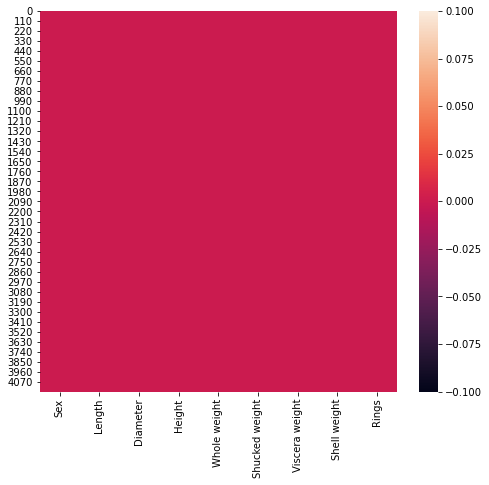

In [16]:
#checking null values
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull())

### Countplots

<AxesSubplot:xlabel='Rings', ylabel='count'>

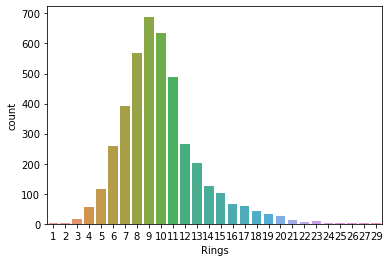

In [17]:
#countplot for Rings variables
sns.countplot(df['Rings'])

if you observe here 7 to 12 Rings are high samples here. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

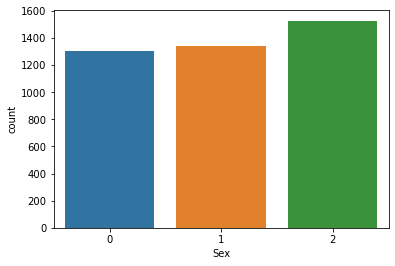

In [18]:
#countplt for Sex variable
sns.countplot(df['Sex'])

<AxesSubplot:>

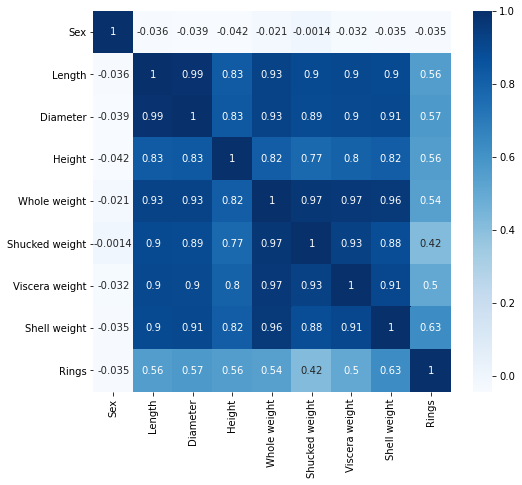

In [19]:
#correlation each other
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

if you observe here sex is negtivily correlation with all other variables.

##### Scatter plots

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

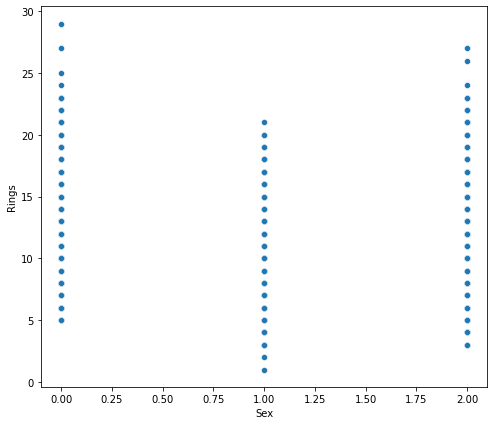

In [20]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Sex',y='Rings',data=df)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

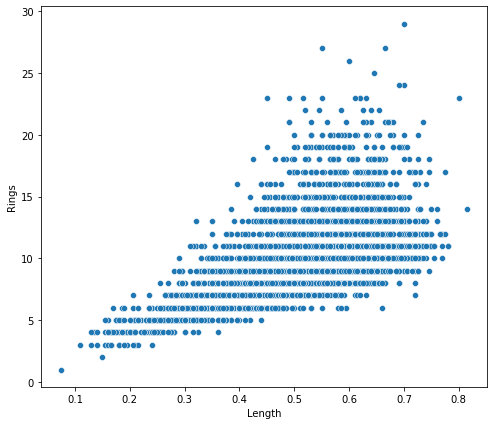

In [21]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Length',y='Rings',data=df)

if you observe here , length of Abalone is increase means Rings also increase.

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

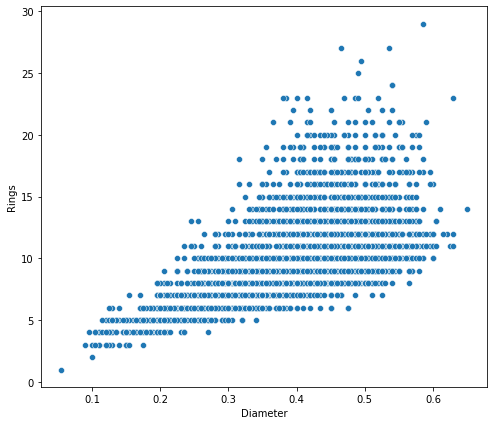

In [22]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Diameter',y='Rings',data=df)

if you observe here, Diameter of Abalone is increase means Rings also increase here.

<AxesSubplot:xlabel='Height', ylabel='Rings'>

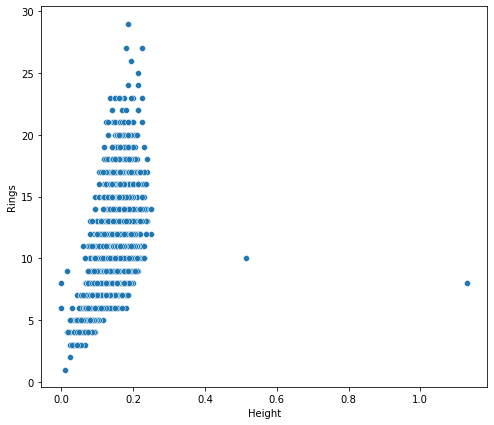

In [23]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Height',y='Rings',data=df)

if you observe here Height of Abalone is increase means Rings also increase.If you observe little bit Height increase means Rings is also increase.

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

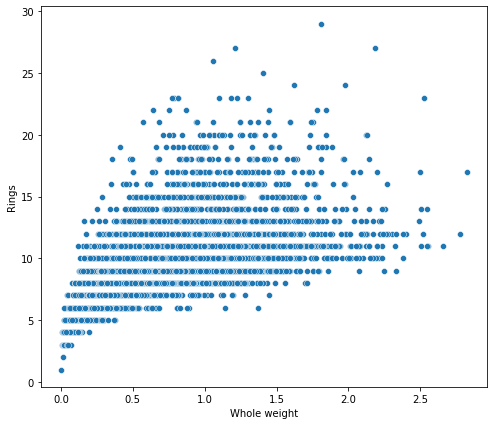

In [24]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Whole weight',y='Rings',data=df)

if you observe here Whole weight of Abalone there is some constent Rings in some Whole Weights.

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

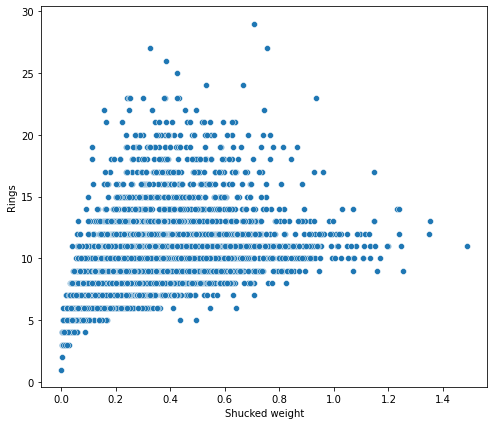

In [25]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Shucked weight',y='Rings',data=df)

If you observe here Shucked Weight is increase means Rings also increase in some weigths Rings are constents.

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

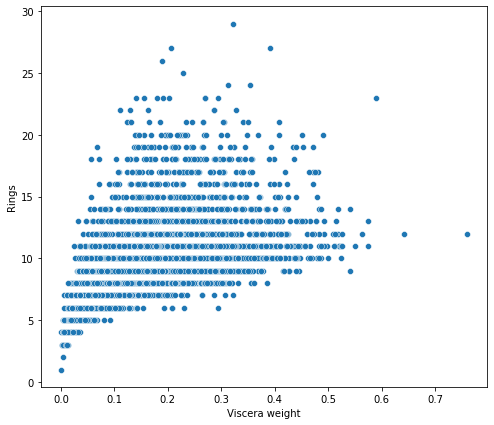

In [26]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Viscera weight',y='Rings',data=df)

if you observe here Viscera weight increase means Rings also increase some Weights Rings are constents.

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

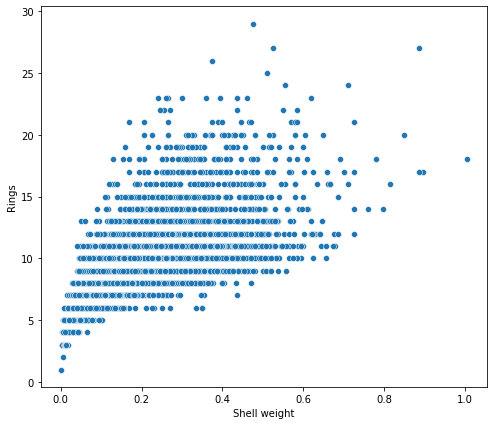

In [27]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='Shell weight',y='Rings',data=df)

if you observe here Shell weight increase means Rings also increase. In some Weights Rings are constents.

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

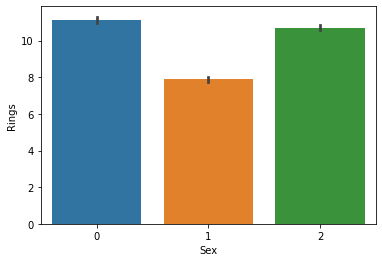

In [28]:
sns.barplot(y='Rings',x='Sex',data=df)

if you observe here Female have maximum rings here.

In [29]:
#setting theme
sns.set_theme()

<AxesSubplot:xlabel='Length', ylabel='Rings'>

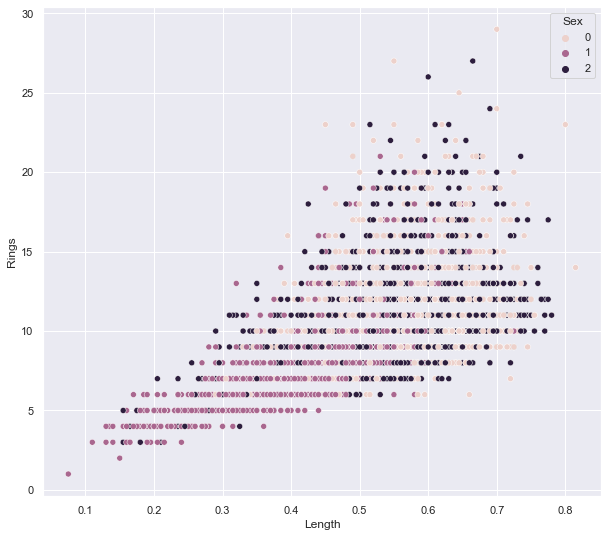

In [30]:
plt.figure(figsize=(10,9))
sns.scatterplot(y='Rings',x='Length',hue='Sex',data=df)

Observe above plot that length of female Abalone is high compare to other Abalones

<AxesSubplot:xlabel='Height', ylabel='Rings'>

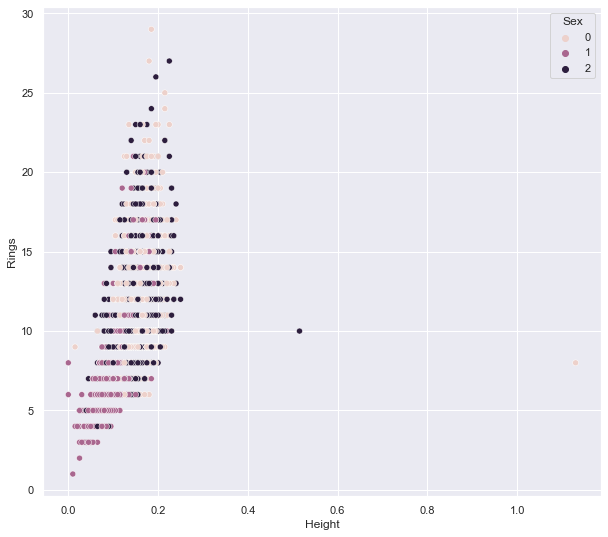

In [31]:
plt.figure(figsize=(10,9))
sns.scatterplot(y='Rings',x='Height',hue='Sex',data=df)

Observe above plot that Height of female Abalone is high compare to other Abalones

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

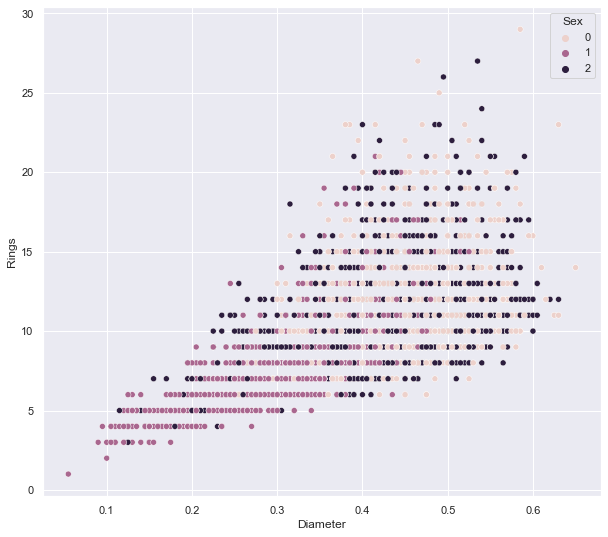

In [32]:
plt.figure(figsize=(10,9))
sns.scatterplot(y='Rings',x='Diameter',hue='Sex',data=df)

Observe above plot that Diameter of female Abalone is high compare to other Abalones

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

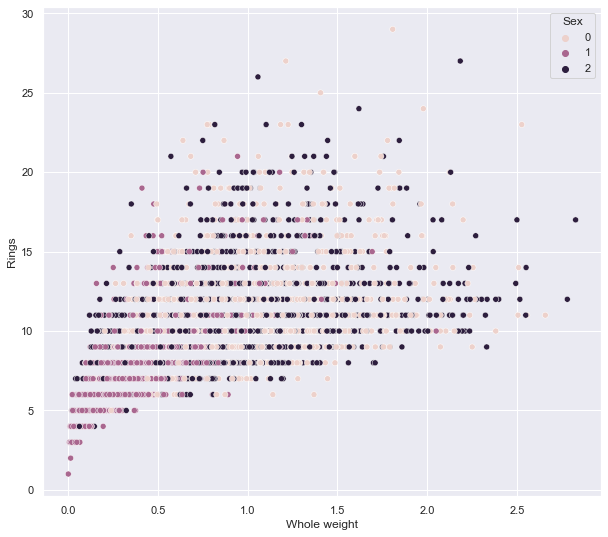

In [33]:
plt.figure(figsize=(10,9))
sns.scatterplot(y='Rings',x='Whole weight',hue='Sex',data=df)

Observe above plot that Whole Weight of female Abalone is high compare to other Abalones

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

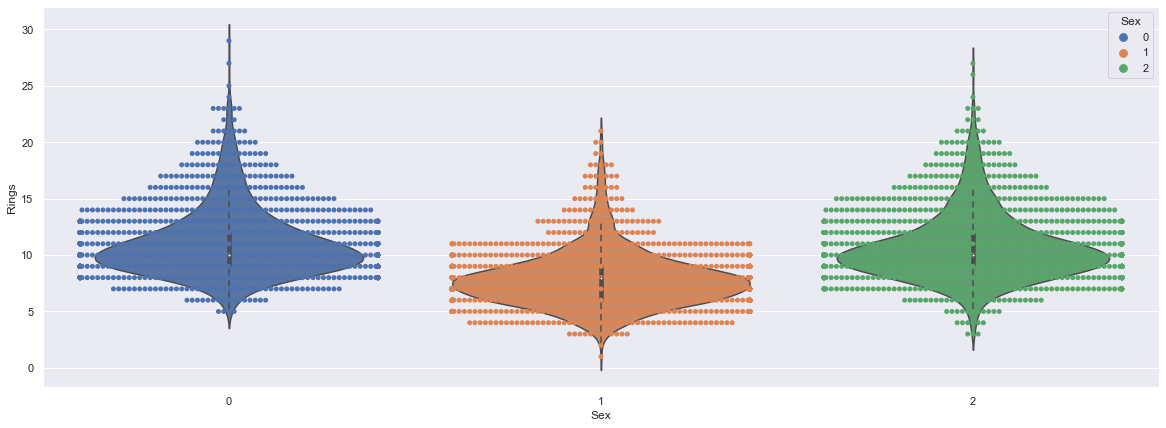

In [33]:
plt.figure(figsize=(20,7))
sns.swarmplot(x='Sex',y='Rings',hue='Sex',data=df)
sns.violinplot(x='Sex',y='Rings',data=df)

##### Pair Plot

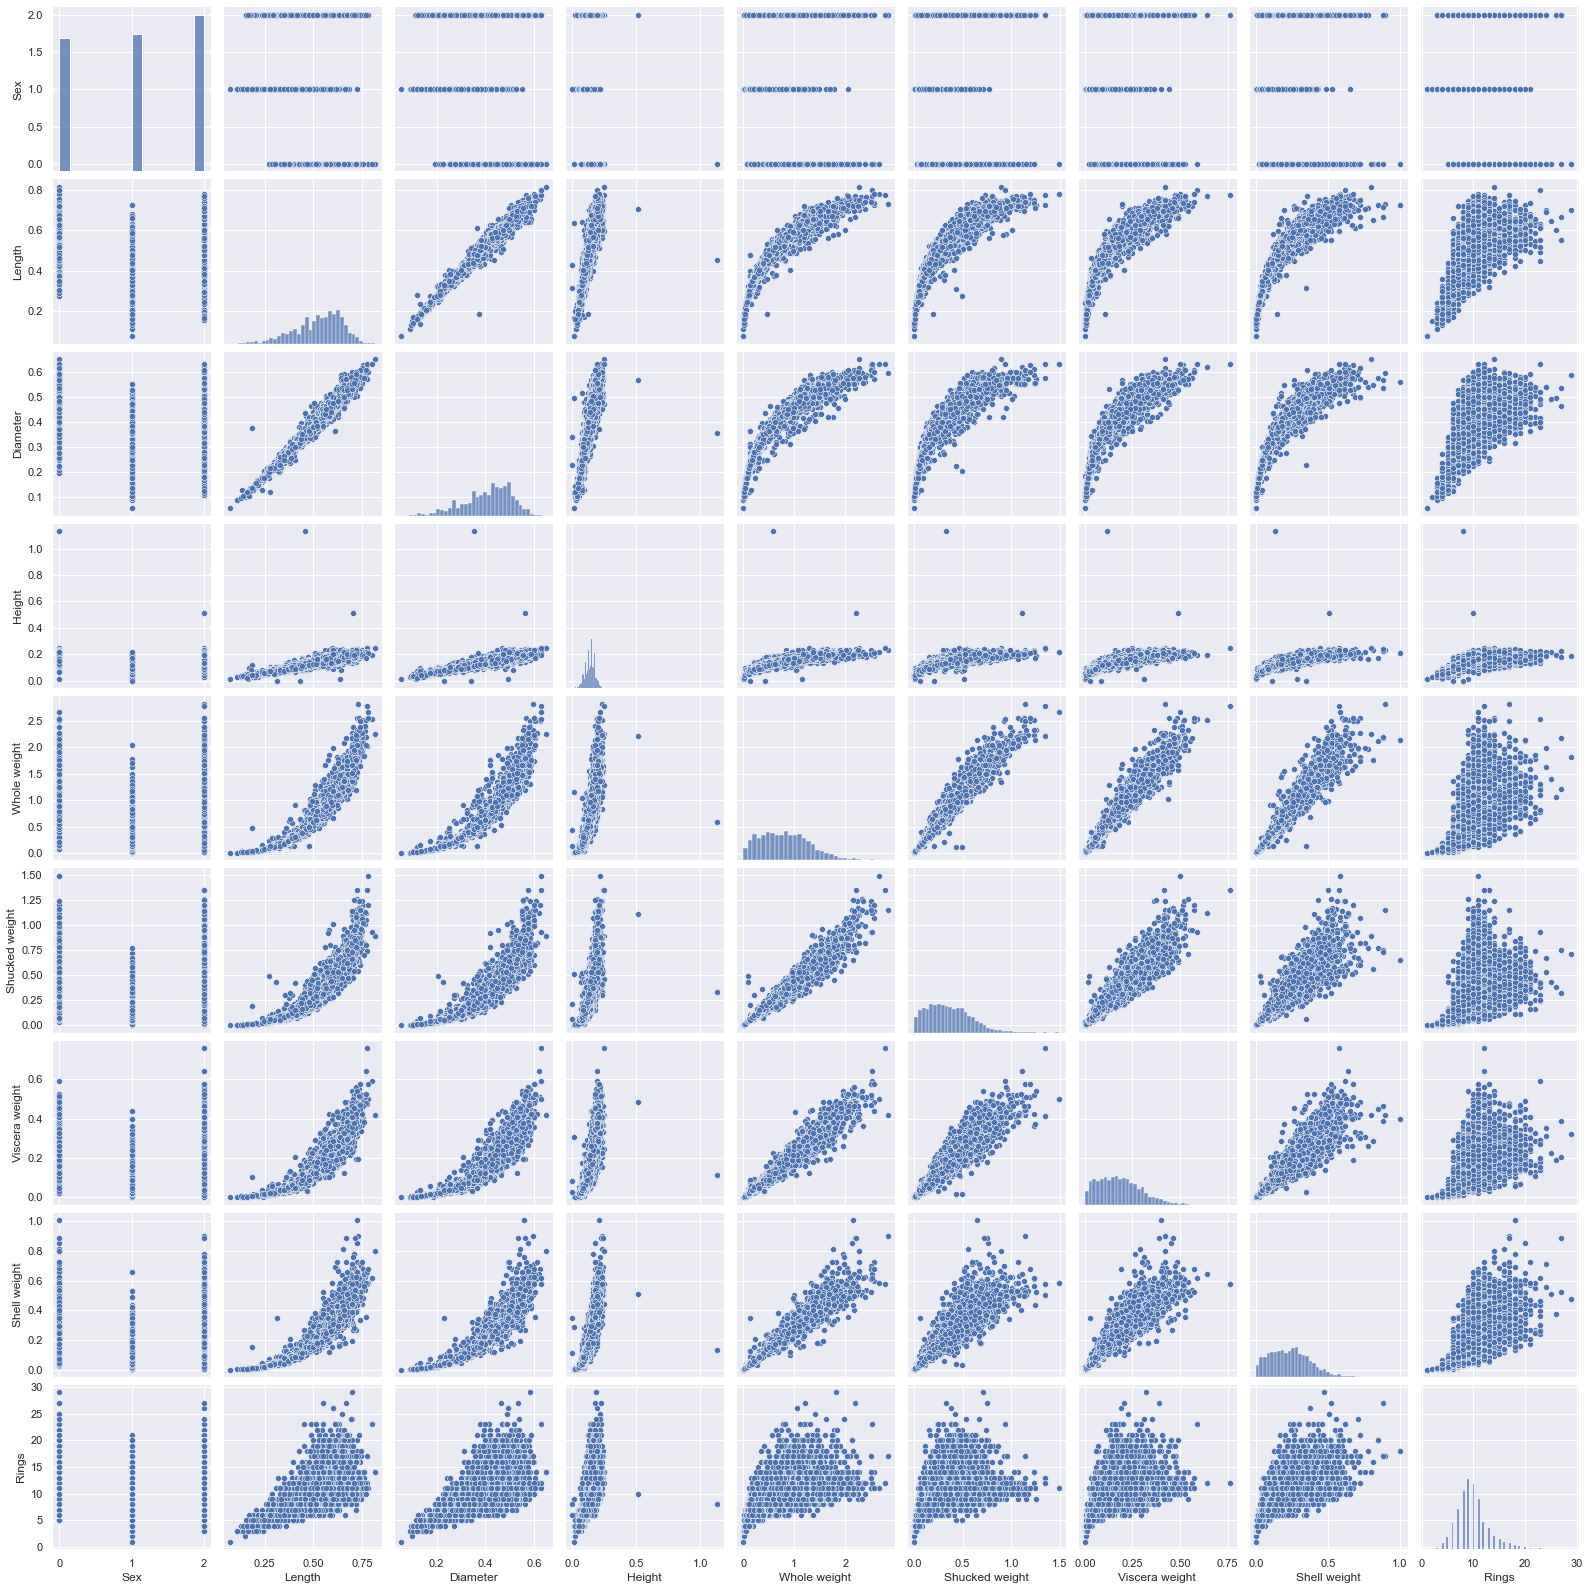

In [34]:
sns.pairplot(df)

### Checking Outliers

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

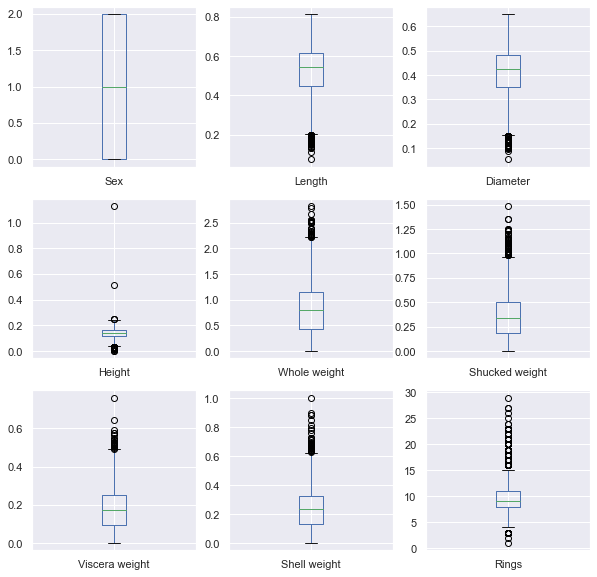

In [35]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

## checking skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

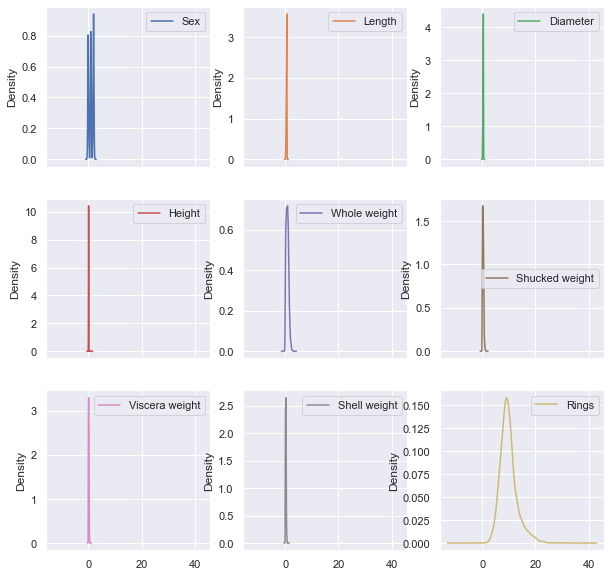

In [34]:
df.plot(kind='kde',subplots=True,layout=(3,3),figsize=(10,10))

## Data Cleansing

#### Variance Inflation Factor(VIF)

In [74]:
x=df.iloc[:,0:-1]

In [75]:
y=df.iloc[:,-1]

In [76]:
x.shape

(4177, 8)

In [77]:
y.shape

(4177,)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def vif():
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [80]:
vif()

,variables,VIF factor
0,Sex,2.555356
1,Length,700.488988
2,Diameter,749.121626
3,Height,42.128924
4,Whole weight,421.652484
5,Shucked weight,101.674946
6,Viscera weight,63.585627
7,Shell weight,81.873737


###### Removing outliers

In [81]:
from scipy.stats import zscore

In [82]:
z=np.abs(zscore(df))

In [83]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [84]:
z[6][8]

3.12251641377204

In [85]:
df_new=df[(z<3).all(axis=1)]

In [86]:
#after removing outliers in dataframe
df_new.shape

(4027, 9)

In [87]:
#before removing outliers in dataframe
df.shape

(4177, 9)

In [88]:
df=df_new

In [89]:
#after removing outliers
df.shape

(4027, 9)

#### Removing skewness

In [90]:
from scipy.stats import boxcox

In [91]:
df['Whole weight']=boxcox(df['Whole weight'],0)

#### Preprocessing

In [93]:
x=df.iloc[:,0:-1]

In [94]:
x.shape

(4027, 8)

In [95]:
y=df.iloc[:,-1]

In [96]:
y.shape

(4027,)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scale=MinMaxScaler()

In [99]:
x=scale.fit_transform(x)

# Model Selection

In [110]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#train and test
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [101]:
lnr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()

In [102]:
list1=[lnr,ridge]

In [103]:
list2=[knr,svr,rfr]

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=33)

In [105]:
for model in list1:
    model.fit(x_train,y_train)
    print(model)
    print(model.score(x_train,y_train))

LinearRegression()
0.5185526722294704
Ridge()
0.5167113748249097


In [123]:
for model in list2:
    model.fit(x_train,y_train)
    print(model)
    print(model.score(x_train,y_train))

KNeighborsRegressor()
0.6590059152234611
SVR()
0.5316409868201326
RandomForestRegressor()
0.9343663546211869


In [124]:
pred=rfr.predict(x_test)

In [125]:
mean_absolute_error(pred,y_test)

1.4687923250564332

In [126]:
mean_squared_error(pred,y_test)

3.946544130925508

In [113]:
r2_score(pred,y_test)

0.1549899562929159

## Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score

In [117]:
for model in list1:
    score=cross_val_score(model,x,y,cv=4)
    print(model)
    print(score)
    print(score.mean())

LinearRegression()
[0.4799329  0.18675523 0.54509906 0.50321921]
0.42875160263641976
Ridge()
[0.46775043 0.19120415 0.54656904 0.49929343]
0.4262042623895289


In [122]:
for model in list2:
    score=cross_val_score(model,x,y,cv=3)
    print(model)
    print(score)
    print(score.mean())

KNeighborsRegressor()
[0.45046166 0.49294154 0.43922979]
0.46087766363662
SVR()
[0.47180909 0.54481891 0.51558777]
0.5107385906480603
RandomForestRegressor()
[0.5326511  0.51073039 0.50453484]
0.5159721103835107


### Final selection model

In [127]:
#RandomForestRegressor model
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9359680040235747

In [128]:
pred=rfr.predict(x_test)

In [130]:
#metrics
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

mean_absolute_error: 1.4758577878103838
mean_squared_error: 3.98701072234763
r2_score: 0.16226825002497447


### Save model

In [131]:
import joblib

In [132]:
#save the model
joblib.dump(rfr,'Abalone_RandomForestRegressor.obj')

['Abalone_RandomForestRegressor.obj']

In [133]:
#load the model
load_Abalone_model=joblib.load('Abalone_RandomForestRegressor.obj')

In [134]:
#check that model is working or not
load_Abalone_model.predict(x_test)

array([10.24,  8.58,  8.67,  7.83, 10.16, 10.2 ,  6.97, 11.84, 12.14,
        7.9 ,  6.46,  9.58, 12.96,  9.56, 12.37,  9.23, 12.74,  8.96,
        9.85,  9.34, 13.4 ,  9.49, 10.34, 12.92,  9.31, 12.97,  7.3 ,
       13.73, 10.26,  9.95, 10.79, 10.26, 11.51, 10.97, 14.59, 10.87,
       10.67,  9.83,  6.72,  9.77, 11.12, 12.86,  5.41,  9.59,  8.51,
        9.14,  8.52,  9.3 ,  9.47,  7.49,  9.71, 14.51,  9.83,  8.6 ,
       15.38, 11.72, 10.4 , 10.78,  7.91, 13.52,  8.31,  8.88,  8.52,
        9.45,  9.57,  8.88,  8.36,  6.79, 11.43, 13.35, 11.87,  6.6 ,
        6.47, 10.52,  9.15,  9.29, 12.16, 11.01,  7.13,  7.49, 14.13,
        9.27, 10.28, 10.12,  8.49,  9.09, 10.47,  9.73,  5.95,  6.98,
       13.44, 13.04,  6.04, 11.81,  9.18, 13.03,  7.34, 10.93, 10.3 ,
        9.74, 11.97, 13.3 , 10.76,  8.29, 10.37, 10.96, 11.48,  5.58,
       12.78, 10.69,  9.99, 10.91, 11.02, 10.81, 12.16, 10.55,  9.98,
        7.24,  8.31, 10.81,  7.87,  7.19, 10.34,  4.42,  9.22, 10.53,
       11.34, 10.25,